<a href="https://colab.research.google.com/github/neiraRail/BDF-animation/blob/main/Animaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Animación del algoritmo BFS en grafo

## Grafo en cuestión:

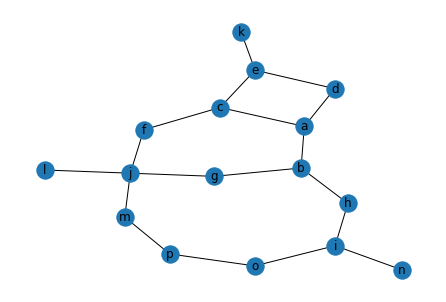





In [51]:
graph = {
    'a': ['b', 'c', 'd'],
    'b': ['h', 'g'],
    'c': ['f', 'e'],
    'd': ['e'],
    'e': ['k'],
    'f': ['j'],
    'g': ['j'],
    'h': ['i'],
    'i': ['o','n'],
    'j': ['m', 'l'],
    'k': [],
    'l': [],
    'm': ['p'],
    'n': [],
    'o': ['p'],
    'p': [],
}

## Algoritmo de BFS:

Este algoritmo recorre un grafo por capas, haciendo uso de una cola que va llenando con los nodos visitados y sus vecinos.

In [9]:
def bfs(graph, node): #function for BFS
  visited = [] # Nodos visitados
  queue = []   # Cola para el algoritmo
  visited.append(node)
  queue.append(node)

  ruta = []  # Camino recorrido por el algoritmo

  while queue:          # Bucle que visita cada nodo
    m = queue.pop(0) 
    ruta.append(m)

    for neighbour in graph[m]:
      if neighbour not in visited:
        visited.append(neighbour)
        queue.append(neighbour)

  return ruta

In [56]:
from networkx.drawing.nx_pylab import draw_circular
import networkx as nx
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import random

# Graph initialization
G = nx.Graph(graph)

In [61]:
# Ejecución del algoritmo
rutaBFS = bfs(graph, 'a')
rutaDFS = nx.dfs_edges(G, 'a')
rutaDFS = [paso[0] for paso in list(rutaDFS)]

In [62]:
#Cambiar para ver ruta con DFS
ruta = rutaDFS

#Cambiar para ver ruta con BFS
#ruta = rutaBFS

ruta

['a', 'b', 'h', 'i', 'o', 'p', 'm', 'j', 'f', 'c', 'e', 'e', 'j', 'j', 'i']

## Animación del algoritmo.

- Se utiliza el módulo animation de la libreria matplotlib
- Crea una animación ejecutando la funcion animate() en cada frame
- En cada frame se pintan los nodos visitados segun la ruta
- Se guarda la animación del algoritmo en el archivo Ejemplo.gif


**Nota**: Ya que el código para animación depende unicamente de *ruta*, se puede aplicar este mismo código con otros algoritmos de búsqueda como DFS, siempre y cuando estos algoritmos retornen una lista guardad en ruta.

In [54]:
def crear_color_map(ruta_actual):
  color_map = []

  for node in G:
    if node in ruta_actual:
      color_map.append('orange')
    else:
      color_map.append('blue')
  return color_map

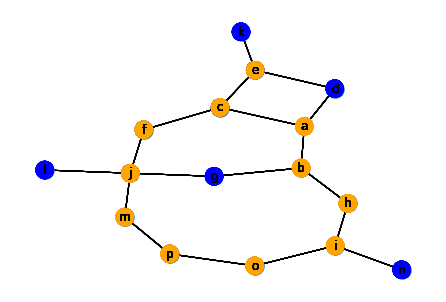

In [63]:
# Animation funciton
ruta_actual = []
def animate(i):
  ruta_actual.append(i)
  color_map = crear_color_map(ruta_actual)
  nx.draw_kamada_kawai(G, node_color=color_map, with_labels=True)

nx.draw_kamada_kawai(G, with_labels=True)
fig = plt.gcf()


# Animator call
anim = animation.FuncAnimation(fig, animate, frames=ruta, interval=100)
anim.save('Animacion.gif', writer = "pillow")